<a href="https://colab.research.google.com/github/Guiih-25/AluraStoreBrasil/blob/main/TelecomX_BR_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extração (carregamento dos dados)

Este notebook realiza uma **análise exploratória de evasão (Churn)** para a base **TelecomX**.

**Objetivos do desafio**
- Explorar as colunas e tipos de dados
- Usar o dicionário para entender as variáveis
- Identificar colunas relevantes para churn
- Detectar e corrigir inconsistências (ausentes, duplicados, formatação, categorias)
- Criar a coluna **Contas_Diarias** (faturamento mensal / 30)
- Fazer EDA (métricas + gráficos) para churn geral, variáveis categóricas e numéricas
- Finalizar com um **relatório** no próprio notebook


In [4]:
# Bibliotecas
from IPython.display import display
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Melhorias visuais (sem depender de estilos externos)
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 11

# Caminhos (arquivos enviados para este ambiente)
DATA_PATH = r"/TelecomX_Data.json"
DICT_PATH = r"/TelecomX_dicionario.md"

# Carregar JSON (lista de clientes)
with open(DATA_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

len(data), list(data[0].keys())

(7267, ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'])

In [5]:
# Normalizar (achatar) o JSON para formato tabular
df_raw = pd.json_normalize(data, sep=".")
print("Shape:", df_raw.shape)
display(df_raw.head())

Shape: (7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 📖 Dicionário de dados (para interpretar as variáveis)

A seguir, o dicionário fornecido no arquivo `TelecomX_dicionario.md`.


In [6]:
with open(DICT_PATH, "r", encoding="utf-8") as f:
    dict_text = f.read()

print(dict_text)

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de co

In [7]:
# Visão geral: colunas e tipos
display(pd.DataFrame({
    "coluna": df_raw.columns,
    "tipo": df_raw.dtypes.astype(str)
}))

# Checagens rápidas
print("\nValores vazios (NaN):")
display(df_raw.isna().sum().sort_values(ascending=False))

print("\nStrings vazias ('') por coluna:")
empty_counts = df_raw.astype(str).apply(lambda s: (s.str.strip() == "").sum())
display(empty_counts[empty_counts > 0].sort_values(ascending=False))

,coluna,tipo
customerID,customerID,object
Churn,Churn,object
customer.gender,customer.gender,object
customer.SeniorCitizen,customer.SeniorCitizen,int64
customer.Partner,customer.Partner,object
customer.Dependents,customer.Dependents,object
customer.tenure,customer.tenure,int64
phone.PhoneService,phone.PhoneService,object
phone.MultipleLines,phone.MultipleLines,object
internet.InternetService,internet.InternetService,object



Valores vazios (NaN):


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0



Strings vazias ('') por coluna:


,0
Churn,224
account.Charges.Total,11


## 🎯 Colunas mais relevantes para análise de evasão

Em churn de telecom, normalmente as variáveis mais preditivas (e úteis para ação) são:

- **Contrato** (mês a mês tende a ter mais churn)
- **Tempo de contrato (tenure)**
- **Cobrança mensal e total** (Charges)
- **Tipo de internet** e serviços adicionais (segurança, suporte, streaming…)
- **Forma de pagamento** e **fatura digital**
- Indicadores demográficos simples (SeniorCitizen, dependentes, parceiro, gênero)

Vamos renomear/organizar e preparar os dados para análise.


# 🔧 Transformação (limpeza e tratamento)

Neste passo vamos:
- Renomear colunas para nomes “limpos”
- Tratar valores vazios em **Churn** e **Charges.Total**
- Converter tipos numéricos (tenure, charges)
- Padronizar categorias como `No internet service` e `No phone service`
- Verificar duplicados


In [8]:
# Renomear colunas (remover prefixos do JSON)
rename_map = {
    "customer.gender": "gender",
    "customer.SeniorCitizen": "SeniorCitizen",
    "customer.Partner": "Partner",
    "customer.Dependents": "Dependents",
    "customer.tenure": "tenure",
    "phone.PhoneService": "PhoneService",
    "phone.MultipleLines": "MultipleLines",
    "internet.InternetService": "InternetService",
    "internet.OnlineSecurity": "OnlineSecurity",
    "internet.OnlineBackup": "OnlineBackup",
    "internet.DeviceProtection": "DeviceProtection",
    "internet.TechSupport": "TechSupport",
    "internet.StreamingTV": "StreamingTV",
    "internet.StreamingMovies": "StreamingMovies",
    "account.Contract": "Contract",
    "account.PaperlessBilling": "PaperlessBilling",
    "account.PaymentMethod": "PaymentMethod",
    "account.Charges.Monthly": "Charges_Monthly",
    "account.Charges.Total": "Charges_Total",
}

df = df_raw.rename(columns=rename_map).copy()

# Remover espaços nas strings
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype(str).str.strip()

# Substituir string vazia por NaN em campos críticos
df["Churn"] = df["Churn"].replace({"": np.nan})
df["Charges_Total"] = df["Charges_Total"].replace({"": np.nan})

# Converter tipos numéricos
df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce")
df["SeniorCitizen"] = pd.to_numeric(df["SeniorCitizen"], errors="coerce").astype("Int64")
df["Charges_Monthly"] = pd.to_numeric(df["Charges_Monthly"], errors="coerce")
df["Charges_Total"] = pd.to_numeric(df["Charges_Total"], errors="coerce")

# Padronizar categorias
df["MultipleLines"] = df["MultipleLines"].replace({"No phone service": "No"})

internet_cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
for c in internet_cols:
    df[c] = df[c].replace({"No internet service": "No"})

# Duplicados
dups = df.duplicated(subset=["customerID"]).sum()
print("Duplicados por customerID:", dups)

# Diagnóstico de ausências (após limpeza leve)
print("\nAusências (NaN) por coluna:")
display(df.isna().sum().sort_values(ascending=False))

display(df.head())

Duplicados por customerID: 0

Ausências (NaN) por coluna:


,0
Churn,224
Charges_Total,11
customerID,0
SeniorCitizen,0
gender,0
Partner,0
Dependents,0
PhoneService,0
tenure,0
InternetService,0


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [9]:
# Correções finais:
# - Para churn: remover linhas sem rótulo (não dá para treinar/avaliar churn sem target)
# - Para Charges_Total ausente: nessa base, os casos costumam ser tenure=0, então total=0

df_clean = df.dropna(subset=["Churn"]).copy()

mask_missing_total = df_clean["Charges_Total"].isna()
print("Charges_Total ausente antes:", mask_missing_total.sum())

df_clean.loc[mask_missing_total & (df_clean["tenure"] == 0), "Charges_Total"] = 0.0

print("Charges_Total ausente depois:", df_clean["Charges_Total"].isna().sum())

# Criar variável numérica de churn
df_clean["churn_flag"] = df_clean["Churn"].map({"Yes": 1, "No": 0}).astype(int)

df_clean.shape

Charges_Total ausente antes: 11
Charges_Total ausente depois: 0


(7043, 22)

## 🧾 Criando a coluna `Contas_Diarias`

Vamos transformar o faturamento mensal em valor diário.

> **Regra aplicada:** `Contas_Diarias = Charges_Monthly / 30`  
(Assumindo 30 dias como aproximação prática.)


In [10]:
df_clean["Contas_Diarias"] = df_clean["Charges_Monthly"] / 30

display(df_clean[["customerID", "Charges_Monthly", "Contas_Diarias"]].head())

,customerID,Charges_Monthly,Contas_Diarias
0,0002-ORFBO,65.6,2.186667
1,0003-MKNFE,59.9,1.996667
2,0004-TLHLJ,73.9,2.463333
3,0011-IGKFF,98.0,3.266667
4,0013-EXCHZ,83.9,2.796667


# 📊 Carga e análise (EDA)

Agora que os dados estão limpos:
- Estatísticas descritivas (média, mediana, desvio padrão…)
- Distribuição do churn
- Churn por variáveis categóricas
- Comparação de variáveis numéricas entre churn vs não churn


In [11]:
# Estatísticas descritivas (numéricas)
num_cols = ["tenure", "Charges_Monthly", "Charges_Total", "Contas_Diarias"]
display(df_clean[num_cols].describe().T)

# Métricas extras úteis
desc_extra = pd.DataFrame({
    "coluna": num_cols,
    "mediana": [df_clean[c].median() for c in num_cols],
    "iqr": [df_clean[c].quantile(0.75) - df_clean[c].quantile(0.25) for c in num_cols],
})
display(desc_extra)

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.000,72.000000
Charges_Monthly,7043.0,64.761692,30.090047,18.250000,35.500000,70.350,89.850,118.750000
Charges_Total,7043.0,2279.734304,2266.794470,0.000000,398.550000,1394.550,3786.600,8684.800000
Contas_Diarias,7043.0,2.158723,1.003002,0.608333,1.183333,2.345,2.995,3.958333


,coluna,mediana,iqr
0,tenure,29.000,46.000000
1,Charges_Monthly,70.350,54.350000
2,Charges_Total,1394.550,3388.050000
3,Contas_Diarias,2.345,1.811667


Contagem (No/Yes):


,count
Churn,
No,5174
Yes,1869


Taxa de churn: 26.54%


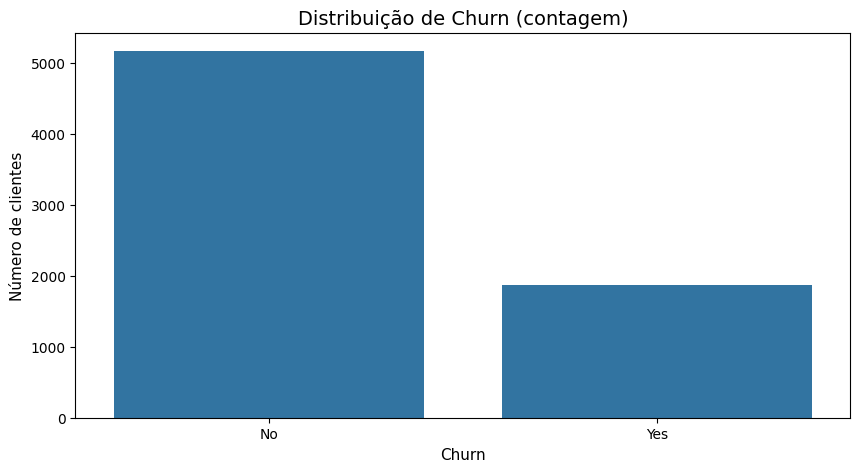

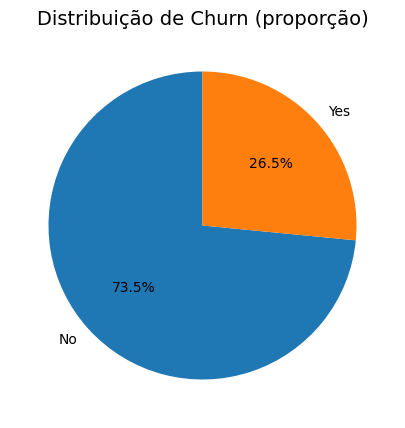

In [12]:
# Distribuição do churn
counts = df_clean["Churn"].value_counts()
rate = df_clean["churn_flag"].mean()

print("Contagem (No/Yes):")
display(counts)
print(f"Taxa de churn: {rate:.2%}")

plt.figure()
sns.barplot(x=counts.index, y=counts.values)
plt.title("Distribuição de Churn (contagem)")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()

plt.figure()
plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribuição de Churn (proporção)")
plt.show()

## 🧩 Churn por variáveis categóricas

Vamos olhar **taxa de churn** (média de `churn_flag`) por categoria.  
Isso ajuda a descobrir “quem está mais propenso a sair”.


,churn_%,n
Contract,,
Month-to-month,42.71,3875
One year,11.27,1473
Two year,2.83,1695


,churn_%,n
PaymentMethod,,
Electronic check,45.29,2365
Mailed check,19.11,1612
Bank transfer (automatic),16.71,1544
Credit card (automatic),15.24,1522


,churn_%,n
InternetService,,
Fiber optic,41.89,3096
DSL,18.96,2421
No,7.40,1526


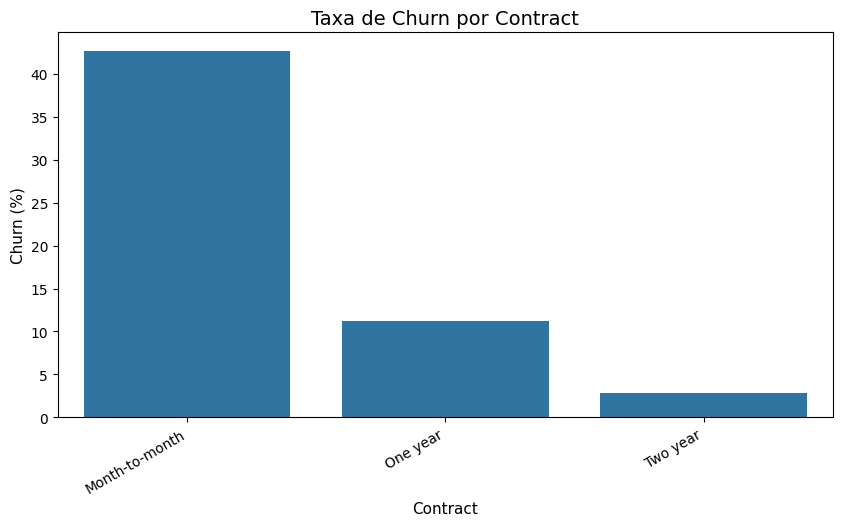

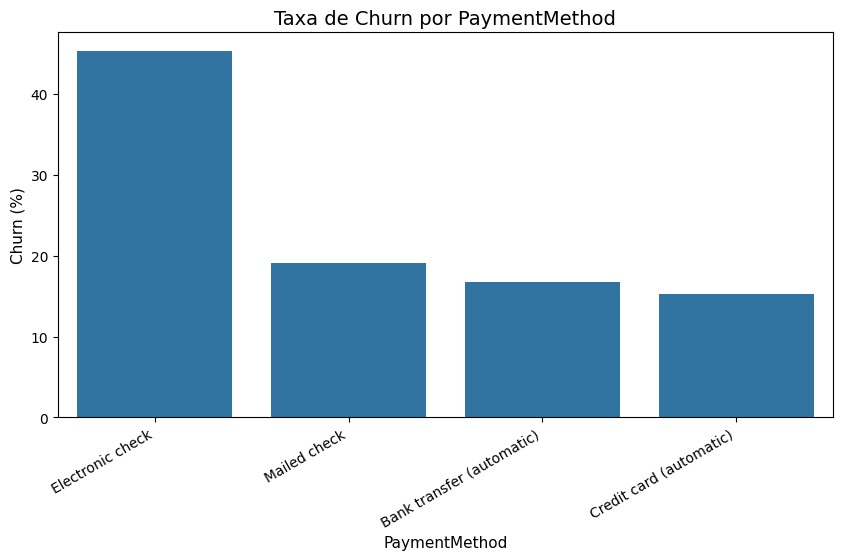

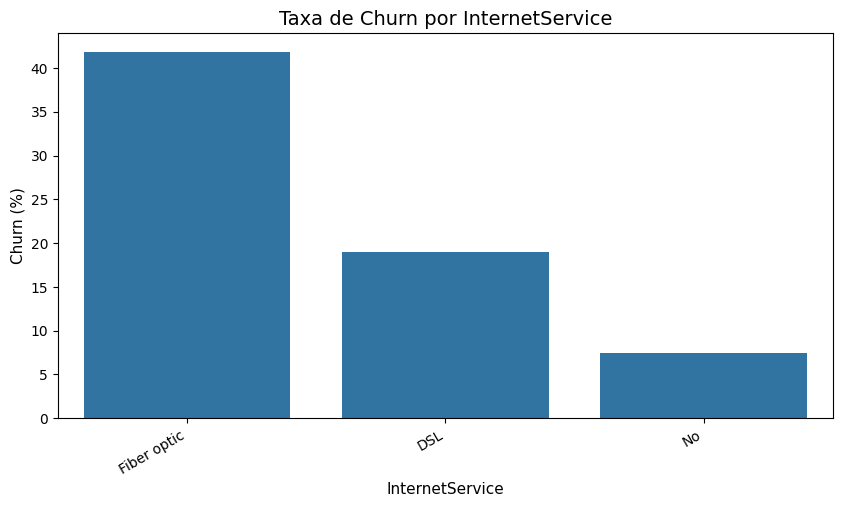

In [13]:
cat_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "PhoneService", "MultipleLines", "InternetService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod"
]

def churn_rate_by(col):
    g = df_clean.groupby(col)["churn_flag"].agg(["mean", "count"]).sort_values("mean", ascending=False)
    g["mean"] = (g["mean"] * 100).round(2)
    g = g.rename(columns={"mean": "churn_%", "count": "n"})
    return g

# Tabelas (principais)
display(churn_rate_by("Contract"))
display(churn_rate_by("PaymentMethod"))
display(churn_rate_by("InternetService"))

# Gráficos: churn_% por categoria (top 3 mais úteis para ação)
for col in ["Contract", "PaymentMethod", "InternetService"]:
    g = churn_rate_by(col).reset_index()
    plt.figure()
    sns.barplot(data=g, x=col, y="churn_%")
    plt.title(f"Taxa de Churn por {col}")
    plt.xlabel(col)
    plt.ylabel("Churn (%)")
    plt.xticks(rotation=30, ha="right")
    plt.show()

## 🔢 Comparação de variáveis numéricas (Churn vs Não Churn)

Aqui a ideia é ver se:
- clientes que saem têm **menor tenure**
- pagam **mais por mês**
- gastaram **menos no total** (por ficarem menos tempo)


tenure               Charges_Monthly               Charges_Total  \
        mean median    std            mean median    std          mean   
Churn                                                                    
No     37.57   38.0  24.11           61.27  64.43  31.09       2549.91   
Yes    17.98   10.0  19.53           74.44  79.65  24.67       1531.80   

                        Contas_Diarias               
        median      std           mean median   std  
Churn                                                
No     1679.52  2329.95           2.04   2.15  1.04  
Yes     703.55  1890.82           2.48   2.66  0.82

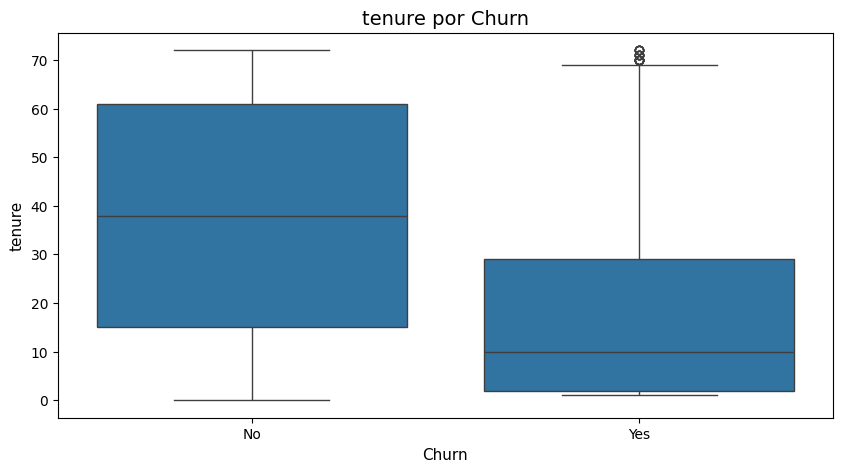

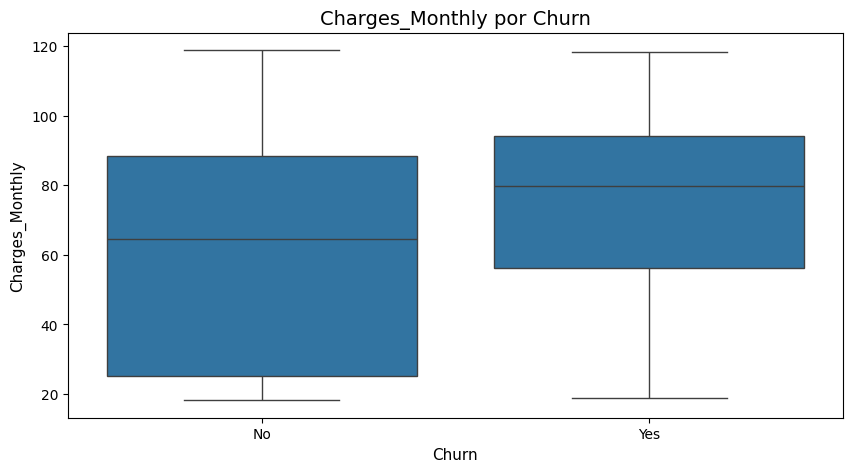

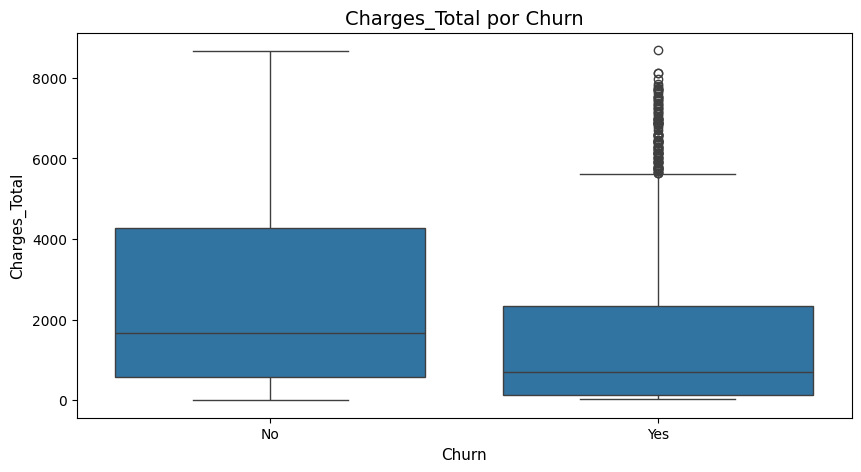

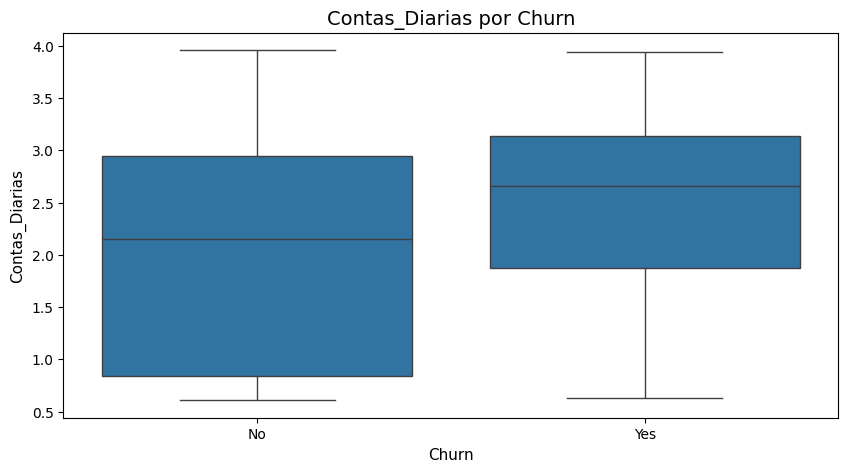

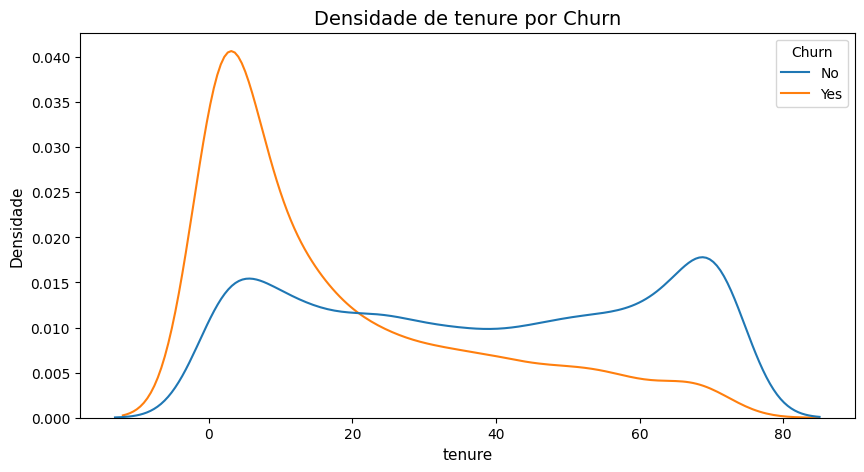

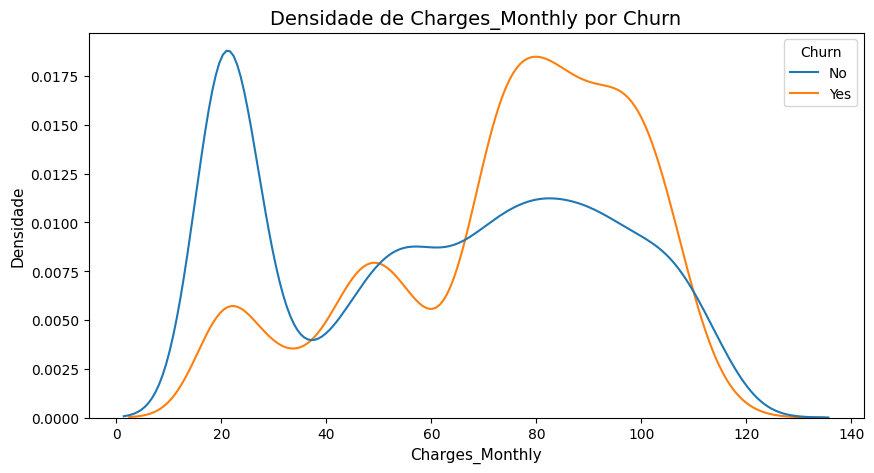

In [14]:
num_cols = ["tenure", "Charges_Monthly", "Charges_Total", "Contas_Diarias"]

# Resumo por grupo
group_stats = df_clean.groupby("Churn")[num_cols].agg(["mean", "median", "std"]).round(2)
display(group_stats)

# Boxplots (um por variável, sem subplots)
for c in num_cols:
    plt.figure()
    sns.boxplot(data=df_clean, x="Churn", y=c)
    plt.title(f"{c} por Churn")
    plt.xlabel("Churn")
    plt.ylabel(c)
    plt.show()

# Histogramas sobrepostos (densidade)
for c in ["tenure", "Charges_Monthly"]:
    plt.figure()
    sns.kdeplot(data=df_clean, x=c, hue="Churn", common_norm=False)
    plt.title(f"Densidade de {c} por Churn")
    plt.xlabel(c)
    plt.ylabel("Densidade")
    plt.show()

# 📄 Relatório Final

## 1) Introdução
O objetivo desta análise é entender o problema de **evasão de clientes (Churn)** na TelecomX e identificar padrões associados ao cancelamento.
Isso ajuda a direcionar ações como ofertas, melhorias de serviço e ajustes de cobrança para **reduzir churn**.

## 2) Limpeza e Tratamento de Dados
Principais passos aplicados:
- Normalização do JSON para tabela (colunas com prefixos `customer.`, `internet.`, `account.` etc.).
- Renomeação de colunas para nomes diretos (ex.: `account.Charges.Monthly` → `Charges_Monthly`).
- Tratamento de valores vazios:
  - `Churn` vazio → removido (não é possível analisar churn sem rótulo).
  - `Charges_Total` vazio → preenchido com **0** quando `tenure = 0`.
- Padronização de categorias para reduzir inconsistências:
  - `No phone service` → `No` (em `MultipleLines`)
  - `No internet service` → `No` (em add-ons de internet)
- Verificação de duplicados por `customerID` (não foram encontrados).

## 3) Análise Exploratória (principais resultados)
- A taxa geral de churn na base ficou em **26.54%**.
- O churn se concentra em clientes com:
  - **Contrato mês a mês** (maior churn: **Month-to-month** com ~**42.7%**).
  - **Pagamento por Electronic check** (maior churn: **Electronic check** com ~**45.3%**).
  - **Internet Fiber optic** (maior churn: **Fiber optic** com ~**41.9%**).
- Variáveis numéricas (comparação churn vs não churn):
  - Clientes que cancelam tendem a ter **menor tempo de contrato (tenure)**.
  - Em média, clientes que cancelam pagam **mais por mês** (Charges_Monthly), sugerindo sensibilidade a preço/valor percebido.
  - O **total gasto (Charges_Total)** é menor em churn porque esses clientes ficam menos tempo.

As visualizações (barras, pizza, boxplots e densidades) sustentam esses padrões.

## 4) Conclusões e Insights
Os sinais mais fortes de churn apontam para:
- **Relacionamento frágil no início** (tenure baixo)
- **Maior risco em contratos flexíveis** (mês a mês)
- **Possível fricção na cobrança** (Electronic check) e/ou perfil de clientes com mais inadimplência/atrito
- **Valor percebido do serviço Fiber optic** pode estar aquém do esperado (custo mais alto + suporte/qualidade)

## 5) Recomendações (ações práticas)
1. **Onboarding e retenção nos primeiros 90 dias**
   - boas-vindas, checagem de qualidade, suporte proativo e ofertas de ajustes.
2. **Incentivo de migração para contratos longos**
   - desconto, bônus de velocidade, upgrade de streaming, etc.
3. **Rever estratégia de pagamento (Electronic check)**
   - estimular formas automáticas (cartão/banco) com incentivo e comunicação clara.
4. **Pacotes e qualidade para Fiber optic**
   - mapear reclamações (suporte), revisar preço vs benefícios, oferecer combos.
5. **Campanhas direcionadas por risco**
   - usar as variáveis mais relacionadas (Contract, PaymentMethod, InternetService, tenure, Charges_Monthly) para segmentar clientes e agir antes do cancelamento.
